### 1. Создание и оценка моделей с разным количеством нейронов

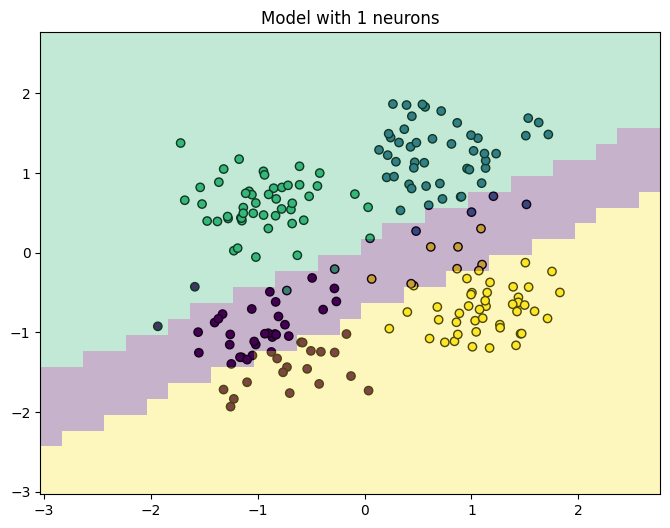

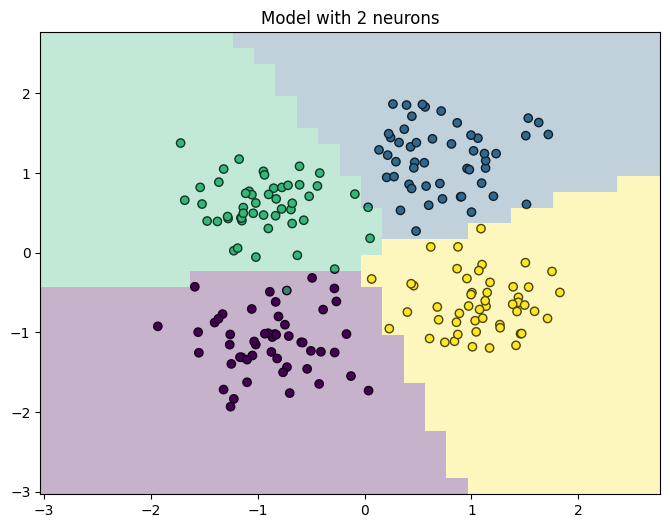

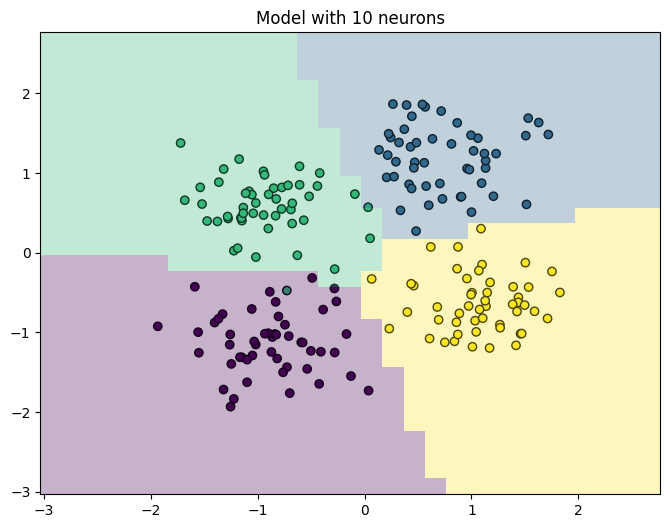

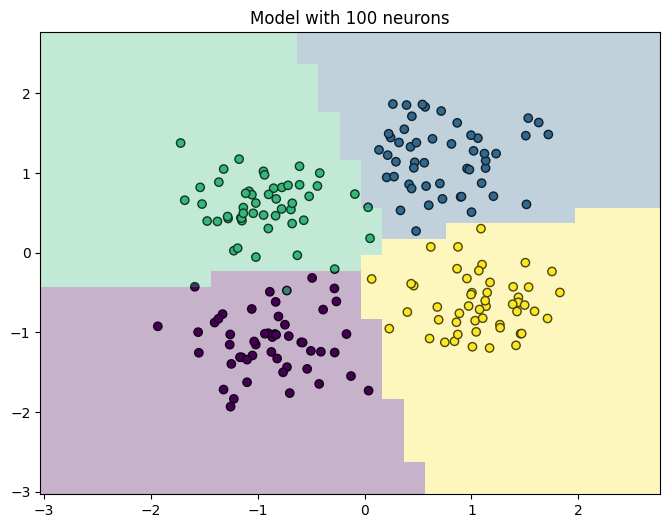

   Neurons  Accuracy
0        1     0.595
1        2     0.990
2       10     0.980
3      100     0.995


In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Создание синтетических данных
blob_centers = [[1, 1], [3, 4], [1, 3.3], [3.5, 1.8]]
X, y = make_blobs(n_samples=200, centers=blob_centers, cluster_std=0.5, random_state=0)
X[:, 0] *= 1000

# Обучение и оценка моделей с разным количеством нейронов
accuracy_train = []
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
neurons_list = [1, 2, 10, 100]

for neurons in neurons_list:
    clf = MLPClassifier(hidden_layer_sizes=(neurons,), max_iter=100_000)
    clf.fit(X_scaled, y)
    train_pred = clf.predict(X_scaled)
    accuracy_train.append(accuracy_score(y, train_pred))

    plt.figure(figsize=(8, 6))
    plt.title(f'Model with {neurons} neurons')
    plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, edgecolors='black', linewidth=1)
    x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
    y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.2), np.arange(y_min, y_max, 0.2))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    plt.pcolormesh(xx, yy, Z, alpha=0.3, cmap='viridis')
    plt.show()

# Вывод точности моделей
neurons_accuracy = pd.DataFrame({'Neurons': neurons_list, 'Accuracy': accuracy_train})
print(neurons_accuracy)


### 2. Создание и оценка моделей с разным количеством слоев




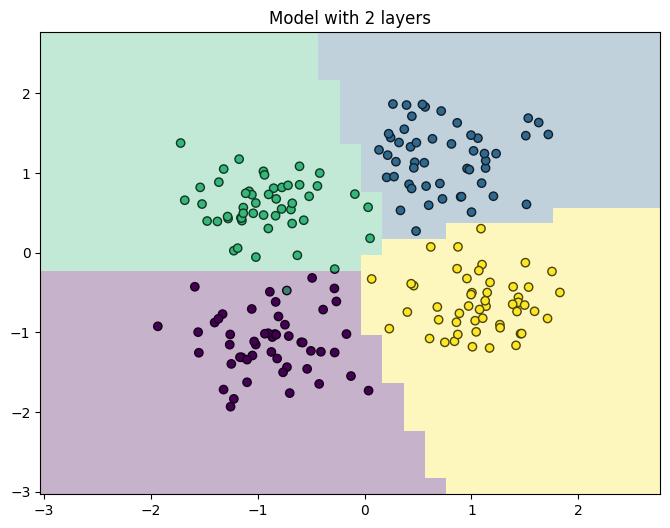

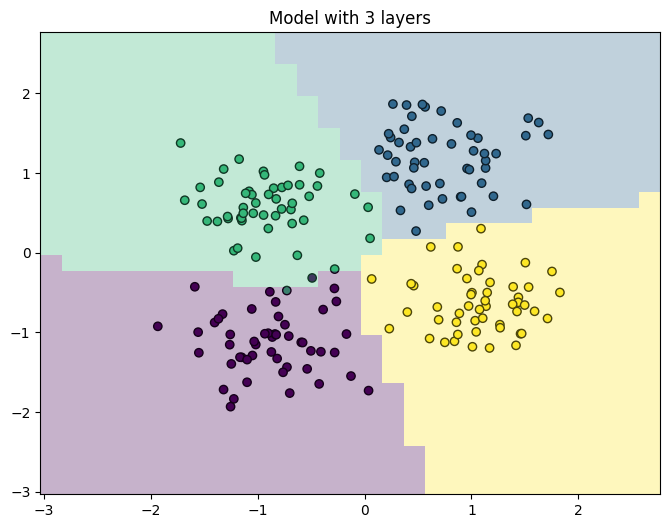

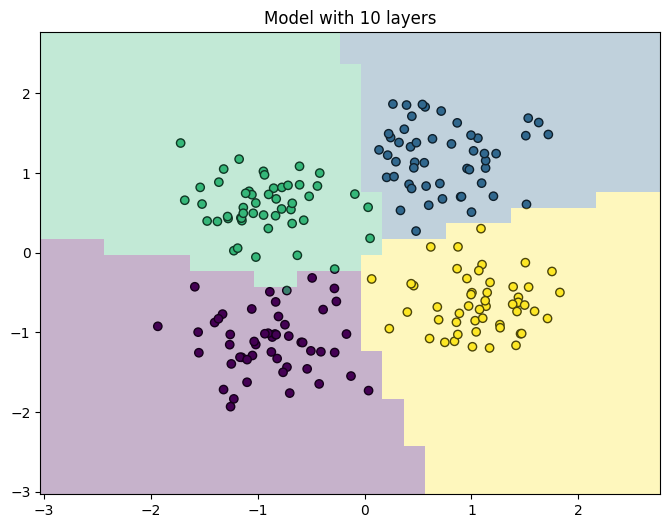

   Layers  Accuracy
0       2     0.995
1       3     0.990
2      10     1.000


In [2]:
# Обучение и оценка моделей с разным количеством слоев
accuracy_train = []
layer_list = [2, 3, 10]

for layers in layer_list:
    clf = MLPClassifier(hidden_layer_sizes=(50,) * layers, max_iter=100_000)
    clf.fit(X_scaled, y)
    train_pred = clf.predict(X_scaled)
    accuracy_train.append(accuracy_score(y, train_pred))

    plt.figure(figsize=(8, 6))
    plt.title(f'Model with {layers} layers')
    plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, edgecolors='black', linewidth=1)
    x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
    y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.2), np.arange(y_min, y_max, 0.2))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    plt.pcolormesh(xx, yy, Z, alpha=0.3, cmap='viridis')
    plt.show()

# Вывод точности моделей
layers_accuracy = pd.DataFrame({'Layers': layer_list, 'Accuracy': accuracy_train})
print(layers_accuracy)


### 3. Вывод весов и смещений для глубокой модели




In [3]:
# Вывод весов и смещений для глубокой модели
clf = MLPClassifier(hidden_layer_sizes=(10, 11, 12), max_iter=100_000)
clf.fit(X_scaled, y)

for i, coef in enumerate(clf.coefs_):
    print(f"Weights for layer {i+1}:")
    print(coef)

for i, intercept in enumerate(clf.intercepts_):
    print(f"Bias for layer {i+1}:")
    print(intercept)


Weights for layer 1:
[[-5.75603949e-01  7.13078171e-01  1.47689776e-01  7.58733111e-01
  -8.32784862e-01 -5.60138513e-01  1.19769438e-04 -4.14396621e-01
  -7.59786636e-01  9.19453167e-01]
 [-3.91895426e-01 -6.25461183e-01  5.41790447e-01  2.03499645e-01
   1.25101741e-01 -6.06945469e-01  1.23655055e-02 -6.31390113e-01
  -1.65083099e-01 -5.12453301e-01]]
Weights for layer 2:
[[ 9.16011612e-01 -1.02898088e+00  1.41428373e-01  8.90942702e-01
  -7.28665545e-01  5.39090412e-01  1.59870058e-01 -8.42528927e-01
   2.07456813e-01  3.86869591e-07 -5.12575188e-01]
 [ 5.97580449e-01 -4.26186908e-01  3.24376681e-01  5.42477653e-01
   4.89639795e-01 -3.30029721e-01 -1.12015251e-01  1.38559876e-01
   1.22070107e-01  5.65974431e-07 -3.04511392e-02]
 [-7.36967154e-01  7.88786940e-01 -1.81896357e-01 -3.76484336e-01
   2.04242115e-01 -6.82254280e-01 -4.25631723e-03  7.24852245e-01
   8.48129855e-02 -2.96382626e-03 -5.43721111e-01]
 [-3.87888537e-01  9.58121884e-03  7.34898838e-02 -2.13332872e-01
  -9.737

### 4. Обучение и оценка модели с большим количеством нейронов и слоев




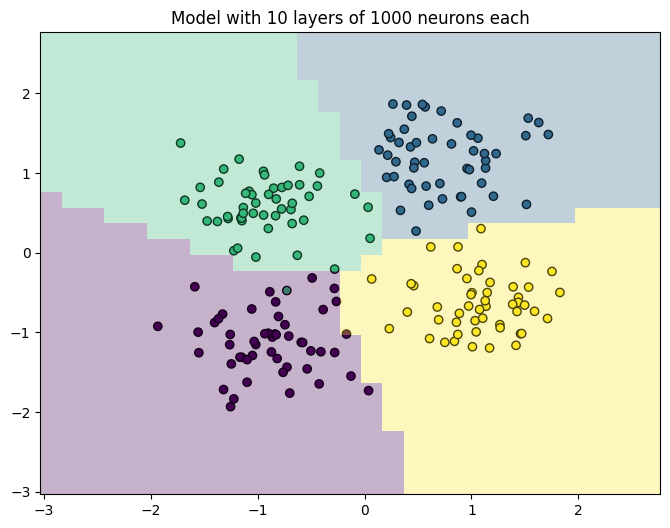

Training time: 29.25 seconds
Accuracy: 0.995


In [4]:
import time

# Обучение и оценка модели с большим количеством нейронов и слоев
clf = MLPClassifier(hidden_layer_sizes=[1000] * 10, max_iter=100_000)
start_time = time.time()
clf.fit(X_scaled, y)
training_time = time.time() - start_time
train_pred = clf.predict(X_scaled)
accuracy_train = accuracy_score(y, train_pred)

plt.figure(figsize=(8, 6))
plt.title('Model with 10 layers of 1000 neurons each')
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, edgecolors='black', linewidth=1)
x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.2), np.arange(y_min, y_max, 0.2))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, alpha=0.3, cmap='viridis')
plt.show()

print(f"Training time: {training_time:.2f} seconds")
print(f"Accuracy: {accuracy_train:.3f}")


### 5. Классификация с использованием перцептрона на датасете Olivetti Faces




In [5]:
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split

from sklearn.datasets import fetch_olivetti_faces
faces = fetch_olivetti_faces()

X = faces.data
y = faces.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = Perceptron()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Classification Accuracy:", accuracy)


downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /Users/olegsuhov/scikit_learn_data
Classification Accuracy: 0.725


### 6. Регрессия с использованием перцептрона на датасете LEV




In [6]:
from sklearn.datasets import fetch_openml
from sklearn.metrics import r2_score, mean_squared_error

dataset = fetch_openml('LEV', version=1)
X = dataset.data
y = dataset.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

reg = Perceptron()
reg.fit(X_train, y_train)
y_pred_reg = reg.predict(X_test)
r2 = r2_score(y_test, y_pred_reg)
mse = mean_squared_error(y_test, y_pred_reg)
print("R2 score:", r2)
print("MSE:", mse)


R2 score: 0.1974701708697616
MSE: 0.755
